In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing, load_digits

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures 

from sklearn.linear_model import LinearRegression, RANSACRegressor, LogisticRegression

# Linear and Logistic Regression

In [2]:
dataset = fetch_california_housing(as_frame=True)

In [3]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Целта ни е да получим оценка за цената, която е median house value. 

In [4]:
dataset.data # получаваме данните в идеалния за sklearn формат. Но казваме asFrame = true и ги позваме в пандас формат, който съдържа и
#  името на колоните и е по-близко до акъла

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
house_prices = dataset.frame # Връша данните в Pandas dataframe

In [6]:
house_prices

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Ще моделираме колоната MedHouseVal като функция на данните, които подаваме. y тилда = f(x). 

На регресията целта и е да събере данните в един и същи модел, да ги обедини. Целта на класификацията е да ги дискриминира, да ги раздели. Във втория случая трябва да намерим клъстери - близки разстояния в клъстера, и далечни разстояния между клъстерите.

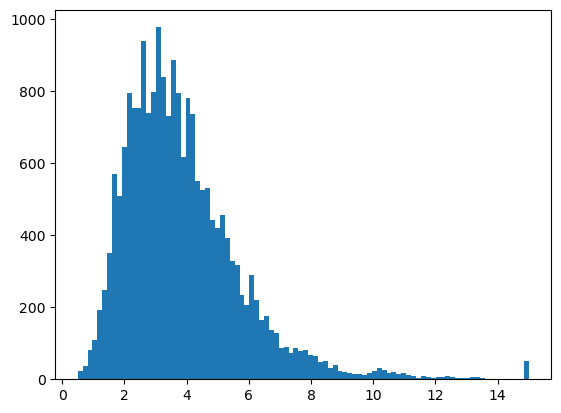

In [7]:
plt.hist(house_prices.MedInc, bins="fd")
plt.show()

Разглеждаме тези вдясно, щото може би са outliers. 

In [8]:
house_prices[house_prices.MedInc > 14].sort_values("MedInc")

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
5304,14.2867,49.0,7.603774,0.946541,850.0,2.672956,34.07,-118.46,5.00001
15698,14.2959,52.0,8.172727,0.872727,304.0,2.763636,37.79,-122.46,5.00001
9811,14.4113,28.0,11.634686,1.509225,569.0,2.099631,36.57,-121.94,5.00001
16915,14.4219,52.0,8.253731,0.950249,519.0,2.582090,37.56,-122.35,5.00001
9370,14.5833,24.0,5.613333,0.853333,163.0,2.173333,37.92,-122.52,5.00001
10483,14.9009,8.0,9.860169,1.114407,899.0,3.809322,33.59,-117.68,5.00001
18052,15.0000,19.0,7.626263,0.939394,267.0,2.696970,37.25,-121.98,5.00001
5260,15.0000,39.0,9.293750,1.018750,414.0,2.587500,34.05,-118.50,5.00001
8853,15.0001,52.0,9.867036,1.091413,1163.0,3.221607,34.07,-118.41,5.00001
8854,15.0001,52.0,8.710145,1.028986,408.0,2.956522,34.07,-118.41,5.00001


In [9]:
house_prices.drop_duplicates().shape

(20640, 9)

Спрямо всички данни нямаме повторения 

Гледаме и коефициенти за корелация. В Python методът corr() се използва за изчисляване на коефициента на корелация между числовите колони на един DataFrame в pandas. Корелацията е статистическа мярка, която показва връзката между две променливи – дали и как една променлива се променя спрямо друга.

In [10]:
house_prices.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


MedInc към MedHouseVal - много голям предиктор. Явно колкото е по-скъп квартала толкова са по-скъпи къщите в него. 

Гледаме и HouseAge щото не искаме да ни изненада. 

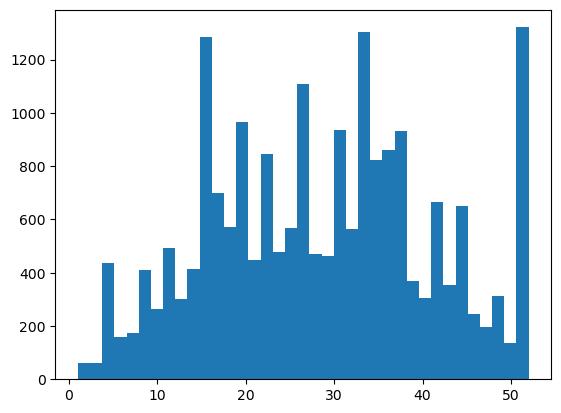

In [11]:
plt.hist(house_prices.HouseAge, bins="fd")
plt.show()

HouseAge е непрекъсната, ама е дискретизирана. 

In [12]:
house_prices.HouseAge.value_counts()

HouseAge
52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: count, dtype: int64

имаме цели числа. Тоест ако една сграда е 41, 5 години или медианата е 41, 5. е закръглена до цяло число

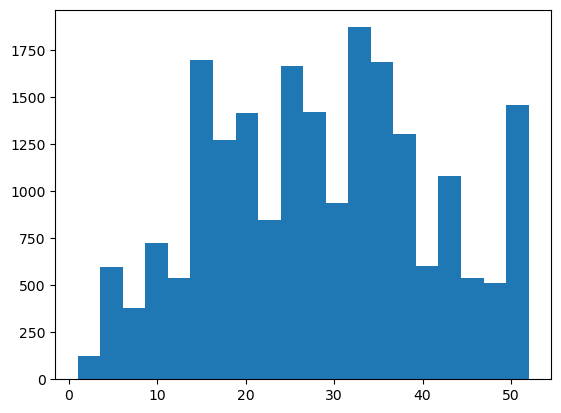

In [13]:
plt.hist(house_prices.HouseAge, bins = 20)
plt.show()

Друго което можем да видим е локация спрямо цена. 

Гледаме Average Occupancy 

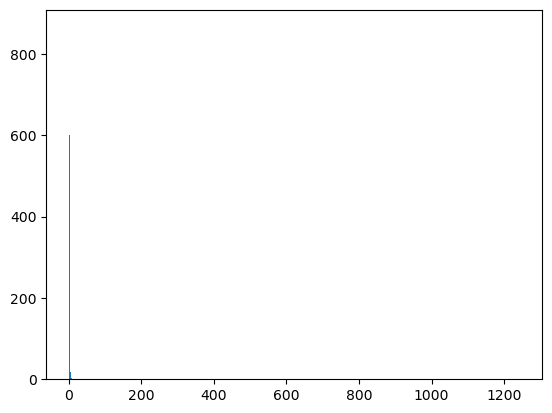

In [14]:
plt.hist(house_prices.AveOccup, bins = "fd")
plt.show()

Тука имаме около 0, но имаме стойности 1200. Да помислим как работи един линеен модел - y tilda = a(occ). Ако числото а е много голямо, при малка промяна на входните данни разликата в резултата ще бъде огромна. И обратно - ако а e много малко, колкото и да променяме входните данни, резултата няма да се промени особено. Което показва нещо просто - някои числа просто са по-големи от други и като такива ще имат по-голямо влияние върху други, просто щото такива са били числата. Ама не искаме да става така. Ако имаме числа 1 и 1000 - малки промени около 1000 ще имат 1000 пъти по-голям ефект от малки промени върху 1

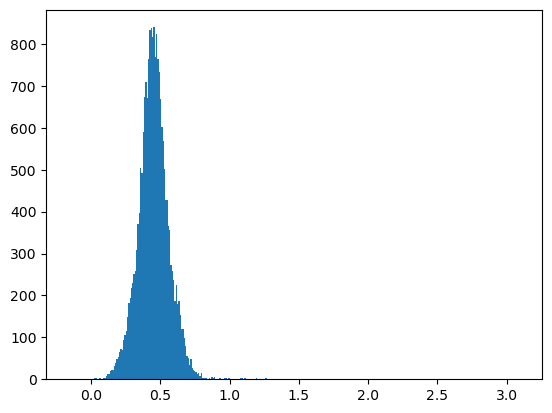

In [15]:
plt.hist(np.log10(house_prices.AveOccup), bins = "fd")
plt.show()

Не е гаусово разпределение, щото има голяма опашка, но виждаме средна стойност 10 на степен 0.4 - към 2.512. Нека да видим дали имам outliers. 

In [16]:
house_prices[np.log10(house_prices.AveOccup) > 1.5].sort_values("AveOccup")

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
13366,4.2578,36.0,5.258824,1.117647,2886.0,33.952941,33.94,-117.63,1.83300
8874,9.3370,52.0,7.285714,1.214286,1154.0,41.214286,34.06,-118.45,5.00001
16420,5.7485,26.0,5.366667,0.900000,1542.0,51.400000,37.89,-121.29,1.62500
12104,1.6250,8.0,7.600000,0.950000,1275.0,63.750000,33.97,-117.33,1.62500
9172,4.2391,5.0,5.123810,0.933333,8733.0,83.171429,34.47,-118.59,1.54600
13034,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15,2.25000
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70,3.50000
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.67500
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.37500


Анализа на данни приключва тук

Целта ни е да разберем как да моделираме. Наивния модел бил директен.Линейна регресия.

In [17]:
house_model = LinearRegression()

In [18]:
house_model

LinearRegression()

можем да го fit-нем. Ако му подадем данните house_prices, ще направим грешка.- той не знае какво става: house_model.fit(house_prices)

Ако му подадем данните house_prices.MedHouseVal

In [19]:
house_model.fit(house_prices, house_prices.MedHouseVal)

LinearRegression()

Какво сбъркахме...

In [20]:
house_model.coef_

array([ 1.26495364e-15,  2.21870696e-16, -2.66012394e-15,  8.98102187e-15,
       -6.56202489e-17,  5.96163248e-17,  4.69618132e-16, -1.37716088e-15,
        1.00000000e+00])

In [21]:
house_model.feature_names_in_

array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal'], dtype=object)

показваме кой feature какъв коефициент има:

In [22]:
list(zip(house_model.feature_names_in_, house_model.coef_))

[('MedInc', 1.264953640420203e-15),
 ('HouseAge', 2.2187069628353092e-16),
 ('AveRooms', -2.6601239437004195e-15),
 ('AveBedrms', 8.981021874646697e-15),
 ('Population', -6.562024892801534e-17),
 ('AveOccup', 5.961632482865053e-17),
 ('Latitude', 4.696181319025433e-16),
 ('Longitude', -1.3771608818078358e-15),
 ('MedHouseVal', 1.0000000000000009)]

Първа грешка - оставяне на изходен feature или някой много подобен на него, който няма да получим в реалните данни, като част от модела. 10-15, 10-16 са практически 0. И MedHouseVal = 1 - може да предскажа MedHouseVal  като имаме MedHouseVal :))) Затова правим: 

In [23]:
house_attributes = house_prices.drop(columns=["MedHouseVal"])
house_values = house_prices.MedHouseVal

In [24]:
house_model.fit(house_attributes, house_values)

LinearRegression()

И вече коефициентите представляват нещо по-различно:

In [25]:
house_model.coef_

array([ 4.36693293e-01,  9.43577803e-03, -1.07322041e-01,  6.45065694e-01,
       -3.97638942e-06, -3.78654265e-03, -4.21314378e-01, -4.34513755e-01])

In [26]:
house_model.feature_names_in_

array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude'], dtype=object)

In [27]:
list(zip(house_model.feature_names_in_, house_model.coef_))

[('MedInc', 0.4366932931343244),
 ('HouseAge', 0.009435778033238284),
 ('AveRooms', -0.10732204139090361),
 ('AveBedrms', 0.6450656935198122),
 ('Population', -3.976389421238152e-06),
 ('AveOccup', -0.003786542654970899),
 ('Latitude', -0.421314377527144),
 ('Longitude', -0.43451375467477815)]

Заради много големи диапазони на някои от променливите е добре да се ползва някакъв начин за нормализация. 
Нещо което почти винаги помага без особени проблеми е MinMaxScaler. Той взима всяка една колона и я трансформира така, че да има стойности между 0 и 1.

In [28]:
scaler = MinMaxScaler()

In [29]:
scaler.fit(house_prices)

MinMaxScaler()

In [30]:
scaler.transform(house_prices)

array([[0.53966842, 0.78431373, 0.0435123 , ..., 0.5674814 , 0.21115538,
        0.90226638],
       [0.53802706, 0.39215686, 0.03822395, ..., 0.565356  , 0.21215139,
        0.70824656],
       [0.46602805, 1.        , 0.05275646, ..., 0.5642933 , 0.21015936,
        0.69505074],
       ...,
       [0.08276438, 0.31372549, 0.03090386, ..., 0.73219979, 0.31175299,
        0.15938285],
       [0.09429525, 0.33333333, 0.03178269, ..., 0.73219979, 0.30179283,
        0.14371281],
       [0.13025338, 0.29411765, 0.03125246, ..., 0.72582359, 0.30976096,
        0.15340349]])

Това е preprossesing функция. fit е да научи данните. И transform. Не изпозлвам Gradient Descent. Използва функция, която му казва по колони колко е минимума, по колони колко е максимума. 


In [31]:
house_prices.min(axis = 0) # Показва по колони колко е минимума. 

MedInc           0.499900
HouseAge         1.000000
AveRooms         0.846154
AveBedrms        0.333333
Population       3.000000
AveOccup         0.692308
Latitude        32.540000
Longitude     -124.350000
MedHouseVal      0.149990
dtype: float64

In [32]:
house_prices.max(axis = 0) # Показва по колони колко е максимума. 

MedInc            15.000100
HouseAge          52.000000
AveRooms         141.909091
AveBedrms         34.066667
Population     35682.000000
AveOccup        1243.333333
Latitude          41.950000
Longitude       -114.310000
MedHouseVal        5.000010
dtype: float64

ако искаме може да не оставяме интервала между 0 и 1, ами между колкото искаме. Ама е най-добре от 0 до 1 или -1 до 1.
Друг начин за скалиране е със Z Score. И тогава използваме не MinMaxScaler, ами StandardScaler. 
Кой да изплозваме - много често може да започнем с MinMax. MinMax запазва първоначалните данни, което означава че за Occupancy ще имаме същия проблем и разпределение. Единственото което прави е да превърне данните (всяка една колона) в 0 до 1. За да може влиянието на всяка една променлива да зависи от това колко наистина е важна, а не от стойността. Искаме коефициентите на модела да определят наистина колко е важна. Имаме умножение коефициент по данни AX. 

Preprocessing функциите ги обучаваме веднъж. След това си остават обучени и ги ползваме за трансформиране. Това можем да го направим наведнъж:

In [33]:
scaler.fit_transform(house_prices) # Същият резултат като след scaler.transform(house_prices)

array([[0.53966842, 0.78431373, 0.0435123 , ..., 0.5674814 , 0.21115538,
        0.90226638],
       [0.53802706, 0.39215686, 0.03822395, ..., 0.565356  , 0.21215139,
        0.70824656],
       [0.46602805, 1.        , 0.05275646, ..., 0.5642933 , 0.21015936,
        0.69505074],
       ...,
       [0.08276438, 0.31372549, 0.03090386, ..., 0.73219979, 0.31175299,
        0.15938285],
       [0.09429525, 0.33333333, 0.03178269, ..., 0.73219979, 0.30179283,
        0.14371281],
       [0.13025338, 0.29411765, 0.03125246, ..., 0.72582359, 0.30976096,
        0.15340349]])

In [34]:
house_attributes_scaled = scaler.fit_transform(house_attributes)

In [35]:
house_model_scaled = LinearRegression()

In [36]:
house_model_scaled.fit(house_attributes_scaled, house_prices) # Таргет променливата няма нужда да бъде скалирана.

LinearRegression()

Виждаме таргет променливата какво разпределение има:

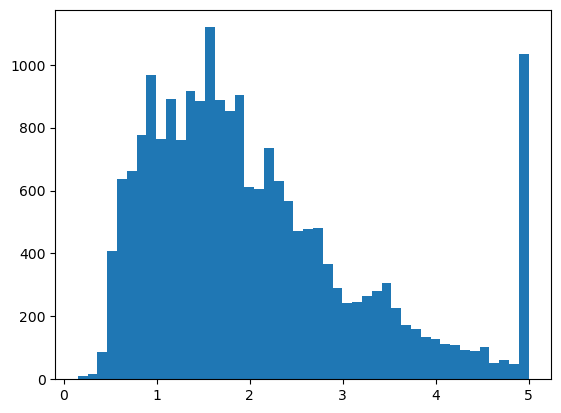

In [37]:
plt.hist(house_prices['MedHouseVal'], bins="fd")
plt.show()

Може би тези с > 5 са тези с цена > 500 000. Проверяваме колко са 

In [38]:
house_prices[house_prices.MedHouseVal > 5]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001
494,9.3959,52.0,7.512097,0.955645,1366.0,2.754032,37.85,-122.24,5.00001
509,7.8772,52.0,8.282548,1.049861,947.0,2.623269,37.83,-122.23,5.00001
...,...,...,...,...,...,...,...,...,...
20422,5.1457,35.0,6.958333,1.217593,576.0,2.666667,34.14,-118.90,5.00001
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,5.00001
20427,8.6499,4.0,7.236059,1.032528,5495.0,2.553439,34.19,-118.80,5.00001
20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69,5.00001


965 реда от 20 000. Като видим, че на тях стойността е само 1. 

In [39]:
house_prices[house_prices.MedHouseVal > 5].MedHouseVal.unique()

array([5.00001])

Затова ще ги изключим по 2 причини :
1. Да ги махнем от DataSet-a
2. Да ги обработваме отделно. 
   Този модел не е за тях, щото са специални и не им знаем оргиналната стойност. На една регресия не можем да и кажем дай ми едно число > 5 (може в невронна мрежа, ама не в sklearn).
Затова правим:

In [40]:
house_prices = house_prices[house_prices.MedHouseVal <= 5]

Пускаме оргиналната регресия и получаваме различни коефициенти.

In [41]:
house_attributes = house_prices.drop(columns=["MedHouseVal"])
house_values = house_prices.MedHouseVal

In [42]:
house_model.fit(house_attributes, house_values)

LinearRegression()

In [43]:
house_model.coef_

array([ 4.32039991e-01,  8.17895781e-03, -1.10512216e-01,  6.13453908e-01,
        4.59347590e-06, -3.44772055e-03, -3.79403380e-01, -3.95909847e-01])

In [44]:
house_model.feature_names_in_

array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude'], dtype=object)

In [45]:
list(zip(house_model.feature_names_in_, house_model.coef_))

[('MedInc', 0.4320399907515529),
 ('HouseAge', 0.00817895781413593),
 ('AveRooms', -0.1105122155201782),
 ('AveBedrms', 0.6134539079605428),
 ('Population', 4.593475896530102e-06),
 ('AveOccup', -0.003447720551817111),
 ('Latitude', -0.3794033795650474),
 ('Longitude', -0.39590984689672415)]

Получихме по-голяма зависимост на  Latitude, Longitude, което означава по-голяма зависимост къде в щата се намираме.
Скалираме

In [46]:
house_attributes_scaled = scaler.fit_transform(house_attributes)

In [47]:
house_model_scaled.fit(house_attributes_scaled, house_values)

LinearRegression()

In [48]:
list(zip(house_model.feature_names_in_, house_model_scaled.coef_))

[('MedInc', 6.26466627389567),
 ('HouseAge', 0.41712684852093007),
 ('AveRooms', -14.553041960731662),
 ('AveBedrms', 20.69384516186906),
 ('Population', 0.16389062651232633),
 ('AveOccup', -4.284279002633796),
 ('Latitude', -3.5701858017070918),
 ('Longitude', -3.974934862843124)]

Виждаме, че коефициентите имат вече други стойности. Сравняваме ги. 

Във вторият случай коефициентите са по-добри, от тях липсват числени грешки, служат за директно интерпретиране на модела и на това кои feature-и са важни за модела.

Правим трети експеримент със StandardScaler:

In [49]:
z_score = StandardScaler().fit_transform(house_attributes)

In [50]:
z_score

array([[ 2.96038034,  1.00838834,  0.70806549, ..., -0.050757  ,
         1.03650334, -1.32937755],
       [ 2.94522334, -0.5904867 ,  0.3826581 , ..., -0.09268007,
         1.02719992, -1.32439265],
       [ 2.28035331,  1.88776961,  1.27688557, ..., -0.02755242,
         1.02254821, -1.33436245],
       ...,
       [-1.25886958, -0.9102617 , -0.06776868, ..., -0.07238292,
         1.75751838, -0.82590242],
       [-1.15238848, -0.83031795, -0.0136918 , ..., -0.09142276,
         1.75751838, -0.87575144],
       [-0.82033558, -0.99020545, -0.04631844, ..., -0.04497942,
         1.72960812, -0.83587222]])

In [51]:
z_score.shape

(19675, 8)

In [52]:
z_score_model = LinearRegression()

In [53]:
z_score_model.fit(z_score, house_values)

LinearRegression()

In [54]:
list(zip(house_model.feature_names_in_, z_score_model.coef_))

[('MedInc', 0.6784028909722376),
 ('HouseAge', 0.10230890631596919),
 ('AveRooms', -0.253347034732133),
 ('AveBedrms', 0.2771752706172416),
 ('Population', 0.005253189350408346),
 ('AveOccup', -0.036655154221234325),
 ('Latitude', -0.8156213233862954),
 ('Longitude', -0.7942178625015112)]

Пак получаваме стойности, които са сравнително ниски. Z-Score прави средното аритметично да бъде 0, стандартното отклонение да бъде 1. Най-голямо значение има знака. 

Latitude - имаме 3 стойности - различни модели за различни подадени данни. Скалирането по някакъв начин трябва да го има. показва колко е важно подаването на данни.

LinearRegression не ползва Gradient Descent.

ML Flow - експеримент - линейна регресия върху California Housing prices:
1 run - нескалирани данни
2 run - скалирани данни с MinMaxScaler
3 run - скалирани данни с StandardScaler

три отделни run за един експеримент.
Нормално е да имаме десетки модели с десетки подавания на данни.
За оценки на модели ще говори друг път. Но например:

In [55]:
z_score_model.score(z_score, house_values)

0.5701011070331932

коефициент на определеност - нещо като квадрата на корелация между единия и другия dataset.

Друг въпрос, който си задаваме, е - струва ли си да го видим? Ползваме слайда за идея как работи multiple linear regression:
Delving Deeper into Matrices. Всеки трябва поне веднъж в живота си да е писал Linear Regression от нулата - с много входни параметри и много на брой данни. Ако моделът е стабилен, резултатите трябва да са подобни на върнатите от линейната регресия на sklearn. Начинините, по който работи Linear Regression, e QR decomposition - имате една матрица от данни, която разлагате като произведение на две матрици. Едната има ортогонални колони, другата има 0 под главния диагонал. 

Ако имаме категорийни променливи, scaling за тях не работи, дори да са кодирани като числа. Коментирахме one hot encoding.

Как работи регресия, в която има outliers (нормални данни с поведение различни от нормалното). Записът outlier е спрямо някакъв модел. А аномалия могат дори да бъдат моделирани добре, но са в много крайните диапазони на едно разпределение и дори се случват много рядко. 

Какво става, ако имаме outliers? Можем да се опитаме да направим модел на по-малко данни, и той работи много добре. Ако можем да си изберем подходящ subset от данни - inliers - значи има начин да вземем много добър модел (+) с цената на не всички данни, които описваме (-). Губим част от описателната способност на модела - описва само част от dataset, но пък имаме много по-перфектен модел за тази част от него. Много полезно ако имаме outliers и ако знаем колко % са от данните. Такъв един начин се нарича RANSAC (RANdom SAmple Consensus).
Какво правим - взимаме случаен брой от данните, fit-ваме модела върху тях и получаваме някакви резултати.
Взимаме друг subset от данните, fit-ваме нов модел.
За някои от тях между двата subset-а от данните моделите ще имат съгласие, за други няма.
После го правим 3, 4, 5- ти път или колкото си искаме.
И данните, които са били inliers във всеки един модел, дават нашия Sample Consensus. Напомня на Монте Карло симулациите. 
Основното, което прави, е след няколко на брой семплирания, получаваме като inliers тези данни, които са били навсякъде.
Използваме RANSACRegressor - нямаме класификация тук, само регресия.

In [56]:
ransac_model = RANSACRegressor()

In [57]:
ransac_model.fit(house_attributes_scaled, house_values) #Фитваме върху скалирани атрибути, защото има много по-голямо значение.

RANSACRegressor()

In [58]:
ransac_model.estimator_.coef_ #Понеже е линейна регресия си има коефициенти

array([   6.07630212,    0.42498388,   -9.33027347,   21.22593623,
         -0.35019426, -133.18460808,   -5.44959671,   -6.20016465])

134.46854526 - Average Occupancy - има огромен коефициент - защото махнаме outliers.

In [59]:
# Моделът дава inlier mask и казва колко от данните са били вътре:
ransac_model.inlier_mask_

array([ True,  True,  True, ..., False, False, False])

In [60]:
ransac_model.inlier_mask_.sum()

13769

In [61]:
# Взимаме оргиналните данни, които са inliers.
house_attributes[ransac_model.inlier_mask_]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
...,...,...,...,...,...,...,...,...
20625,4.1250,37.0,7.285714,1.214286,29.0,2.071429,39.12,-121.52
20628,2.5952,19.0,5.238462,1.079487,1018.0,2.610256,39.10,-121.48
20631,3.5179,15.0,6.145833,1.141204,1200.0,2.777778,39.33,-121.40
20633,2.5495,27.0,5.445026,1.078534,1082.0,2.832461,39.19,-121.53


In [62]:
# Взимаме оргиналните данни, които са outliers. Затова взимаме обратното на маската:
house_attributes[~ransac_model.inlier_mask_]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
16,2.7750,52.0,5.939577,1.048338,793.0,2.395770,37.85,-122.27
22,1.7250,52.0,5.096234,1.131799,1015.0,2.123431,37.84,-122.27
23,2.1806,52.0,5.193846,1.036923,853.0,2.624615,37.84,-122.27
24,2.6000,52.0,5.270142,1.035545,1006.0,2.383886,37.84,-122.27
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


Нормално ли е 1/3 от данните да са outliers - не и в случая. 
1. Това са default настройки, можем да ги променим - някой hyperparameter.
2. Нека да се опитаме да predict-нем.

Score на оргиналния модел: 

In [63]:
house_model_scaled.score(house_attributes_scaled, house_values)

0.5701011070331932

In [64]:
ransac_model.score(house_attributes_scaled, house_values)
# Очакваме да получим по-малка стойност, защото оценяваме модела върху всички данни, но той се тренира само върху тези, които попадат в Inlier mask.

-0.759337190206167

Отрицателен score означава, че модел, който предсказва средното аритметично, е по-добър от него. 

Това не е противоречие. Защото ако оценим ransac само върху тези, които попаднат в inlier mask, score e много по-голям:

In [65]:
ransac_model.score(house_attributes_scaled[ransac_model.inlier_mask_], house_values[ransac_model.inlier_mask_])

0.8649539772649943

Какво е RANSACRegressor. Никъде не казваме, че е линейна регресия. Това е един от тези meta learning алгоритми, които помагат на други алгоритми да си вършат работата. Първият параметър на python функцията е estimator - може да му подадем каквото искаме. По дефолт използва линейна регресия.
С различен residual_threshold резултатът е различен: с по-голям резултата е по-голям. 

In [66]:
ransac_model = RANSACRegressor(residual_threshold=1)
ransac_model.fit(house_attributes_scaled, house_values)
ransac_model.inlier_mask_.sum() / len(house_attributes_scaled)

0.7475984752223634

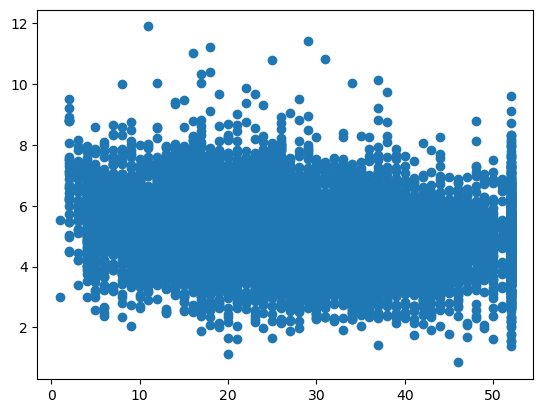

In [67]:
plt.scatter(house_attributes[ransac_model.inlier_mask_]['HouseAge'], house_attributes[ransac_model.inlier_mask_]['AveRooms'])

може да променим и max_trials, и min_samples. Може да повлияем на процеса.
Може да видим, да плотнем едни спрямо други в scatter плот - избираме си две.

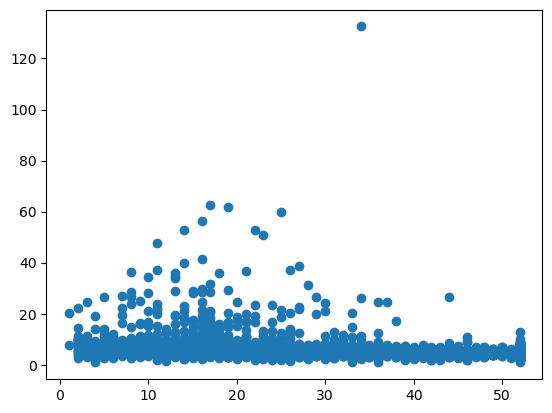

In [68]:
plt.scatter(house_attributes[~ransac_model.inlier_mask_]['HouseAge'], house_attributes[~ransac_model.inlier_mask_]['AveRooms'])

Ако ги плотнем на една фигура, ще видим, че inliers едвам се виждат. 

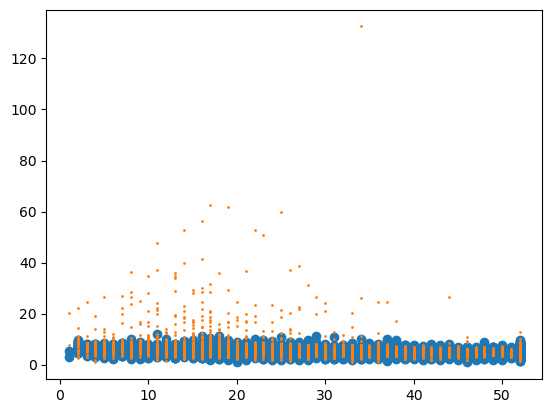

In [69]:
plt.scatter(house_attributes[ransac_model.inlier_mask_]['HouseAge'], house_attributes[ransac_model.inlier_mask_]['AveRooms'])
plt.scatter(house_attributes[~ransac_model.inlier_mask_]['HouseAge'], house_attributes[~ransac_model.inlier_mask_]['AveRooms'], s = 1)

В случая имаме комбинация от outlier и inlier, защото тука показваме само 2 измерения, а outlier може да е outlier по повече от 2 измерения.

Виждаме и как може да повлияем на процеса. В случая медианната разлика не беше достатъчно добра да сметнем outliers. Ще бъде добре ако тази дефиниция е дошла от данните и от нашето познаване на данните. Houseage 30 има твърде висока цена.
Но визуално да търсим outliers е загубена кауза. Затова ако имаме облак от точки, даваме толеранс. 

Може да направим полиномиална регресия от линейна регресия.

Имаме променлива х, полином - x = a3*x^3 + a2*x^2 + a1*x^1 + a0*x^0.  Aма ако сложим t3=x^3 и т.н. - ето линейна регресия. Значи ако предварително се сметнали новите feature-и например : 3

In [70]:
house_attributes["AveRooms~3"] = house_attributes.AveRooms ** 3

In [71]:
house_attributes["AveRooms~3"]

0        340.671954
1        242.753076
2        569.338486
3        196.868367
4        247.892488
            ...    
20635    128.440177
20636    228.551344
20637    141.058105
20638    151.377926
20639    145.093511
Name: AveRooms~3, Length: 19675, dtype: float64

AveRooms на втора по същия начин. Обаче ако имаме много променливи, можем да направим: 

In [72]:
 house_attributes.AveRooms * house_attributes.MedInc

0        58.144254
1        51.785271
2        60.150315
3        32.827897
4        24.161264
           ...    
20635     7.872423
20636    15.632365
20637     8.849423
20638     9.951266
20639    12.551417
Length: 19675, dtype: float64

И това тука е нещо на втора степен, комбинация от тези двете. Много често като умножим 2 колони получаваме такава, която показва взаимодействието между тези две колони. !!! И е много важно тези колони да бъдат скалирани !!! Също можем по-нататък да умножим и с нещо друго....получаваме нещо на 3-та степен. И ако можем да направим това - тука явно можем - получаваме полиномиална регресия, при това в много на брой променливи. + - полиномиална регресия, - - много на брой features. Добавяме в import-a PolynomialFeatures. 

In [73]:
poly_transformer = PolynomialFeatures(degree=3) #Можем да указваме степента.
poly_transformer.fit(house_attributes_scaled)

PolynomialFeatures(degree=3)

In [74]:
poly_transformer.get_feature_names_out() 

array(['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x0^2',
       'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7',
       'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7',
       'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x3^2',
       'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x4^2', 'x4 x5', 'x4 x6',
       'x4 x7', 'x5^2', 'x5 x6', 'x5 x7', 'x6^2', 'x6 x7', 'x7^2', 'x0^3',
       'x0^2 x1', 'x0^2 x2', 'x0^2 x3', 'x0^2 x4', 'x0^2 x5', 'x0^2 x6',
       'x0^2 x7', 'x0 x1^2', 'x0 x1 x2', 'x0 x1 x3', 'x0 x1 x4',
       'x0 x1 x5', 'x0 x1 x6', 'x0 x1 x7', 'x0 x2^2', 'x0 x2 x3',
       'x0 x2 x4', 'x0 x2 x5', 'x0 x2 x6', 'x0 x2 x7', 'x0 x3^2',
       'x0 x3 x4', 'x0 x3 x5', 'x0 x3 x6', 'x0 x3 x7', 'x0 x4^2',
       'x0 x4 x5', 'x0 x4 x6', 'x0 x4 x7', 'x0 x5^2', 'x0 x5 x6',
       'x0 x5 x7', 'x0 x6^2', 'x0 x6 x7', 'x0 x7^2', 'x1^3', 'x1^2 x2',
       'x1^2 x3', 'x1^2 x4', 'x1^2 x5', 'x1^2 x6', 'x1^2 x7', 'x1 x2^2',
       'x1 x2 x3', 'x1 x2 x4', 'x1

Това са всички променливи за получаване на полином от 3-та степен.

In [75]:
poly_regression = LinearRegression()
poly_regression.fit(poly_transformer.transform(house_attributes_scaled), house_values)

LinearRegression()

In [76]:
poly_regression.score(poly_transformer.transform(house_attributes_scaled), house_values)

0.6998591049598404

Получаваме малко по-добър score върху оргиналните данни. Да оценяваме модела върху данните, с които сме го тренирали, не е най-правилното нещо. 

Всеки път като правим някакъв модел трябва да внимаваме да не правим глупости. За грешен модел спрямо данните.
1. Предположение, че имаме линейна връзка между данните и резултата. Корелационни коефициенти не са достатъчни да опишат някои неща. Много често като използваме други модели, ще трябва да поискаме хиперпараметри, чиито стойности трябва да разберем отнякъде. При линейната регресия го няма, има го донякъде от RANSAC, но това налага правенето на процес който е ясен. Защото от различни неща, от това колко добре си познаваме данните, зависи какъв резултат ще получим. Пример : ascombre. 
   

Скалиране на данните се нарича MinMaxScaling, а стандартизация се нарича StandardScaling. И двете се наричат нормализация. В кои случаи е добре да скалираме данните, и в кои не: Краткият отговор е - винаги. Кой вид скалиране ще използваме е основният въпрос. Понякога ако имаме много outliers, може да скалираме спрямо RobustScaler, както и в случая, щото ги имаме. Той скалира спрямо някакви процентили. Винаги скалираме. Няма случай когато може да попречи. Нескалираните данни пречат. 

Как разбираме полином на коя степен ни трябва - оптимизираме си го. По-висока степен ще даде много по-добър резултат, ама на цената на много повече features, и ще стане по-бавно. Например при нас при degree=5 features ще станат 1257. 

Винаги ли features трябва да маневрират между 0 и 1 - зависи от скалирането. Някакъв вид нормализация трябва да имаме винаги. Има модели, дето са страшно чуствителни към скалиране. Най-лесният начин е със MinMaxScaler, много рядко създава проблеми.

При полиномиална регресия, ако всички данни са скалирани и имаме между 0 и 1, тогава при много умножения стават много малки числата. В началото показахме, че коефициентите показват коя променлива колко е важно за модела. В полиномиална регресия имаме доста повече на брой променливи - коефициента не казва сам по себе си коя променлива е важна за модела. 

2. Екстраполация - при произведение на много на брой features - единия си е в range, другия си е в range, ама умножението може да докара стойности, които са много нетипични за dataset-а. Така правим Екстраполация без да искаме. Общо взето всички тези проблеми опират до Curse of Dimentionality.

Най-опасното е да видим зависимости, там където ги няма : spurious correlations.

Диференцирането е добър начин за скалиране на timeseries. np.log10 също е скалиране на данни.

Може би повече задачи за ML представляват класификация отколкото регресия. 
Задача за бинарна класификация - тоест имаме входни данни и резултата може да бъде само 0 или 1 {0, 1} 
Нашият резултат не може да бъде линейна комбинация - трябва да е едно от двете.
Това може да стане, ако използваме функция, на която подаваме резултата от линейната регресия и получаваме 0 или 1.
Нарича се logistic function или sigmoid function. 
Когато направим линейна регресия и я облечем в някаква функция, може да не бъде sigmoid функция - наричаме този модел Generalised Linear Model.
Имаме 2 неща:
1. Резултата е от 0 до 1
2. Ако линейната регресия връща 1, то функцията връща 0.8.


Задача за домашно - защо тогава не ползваме step функцията. 

по маловажната причина е че когато получим стойност между 0 и 1, и такива стойности може да ги ползваме за вероятности. 
Ако един запис ми дава 0.8, друг запис ми дава 0.95 - и двата са клас 1, обаче някак си за втория алгоритъма ми е по-уверен, че е клас 1, и можем да го ползваме колко е уверен нашия модел в резултата който дава. 
Казваме, че ако даде вероятност < 0.2 - това е клас 0. При вероятност > 0.8 - клас 1. Иначе - unknown. Тоест моделът ми каже 0.45, 0.55 - тоест този запис не може да каже толкова ясно това какъв клас е - може да оставя след някакъв post processing - това е unknown/undecided. Ентропията е максимана, когато сме раздвоени между двата класа. Loss function за регресията е cross entrophy. 
Импортваме load_digits. 

In [77]:
load_digits()

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [78]:
mnist_data = load_digits(as_frame=True)['frame']

In [79]:
mnist_data.sample(1)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
366,0.0,0.0,0.0,10.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,16.0,2.0,0.0,0.0,4


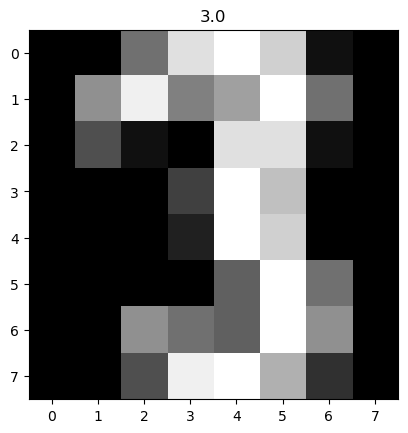

In [80]:
plt.imshow(mnist_data.loc[1170].values[:-1].reshape(8, 8), cmap="gray")
plt.title(mnist_data.loc[1170]["target"])
plt.show()

Проблем - имам повече от 2 класа.
Решение - като направя много на брой класификации, всяка от която решава сама за себе си това е нейния клас.

In [81]:
mnist_data.target.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [82]:
mnist_data.target.value_counts()

target
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

Горе-долу балансиран datasets. Изходът ни е категорийна променлива. Импортваме LogisticRegression

In [84]:
digits_classifier = LogisticRegression(C = 1e12)

Не скалираме данните. 

In [85]:
digits_classifier.fit(mnist_data.drop(columns="target"), mnist_data.target)

LogisticRegression(C=1000000000000.0)

In [86]:
digits_classifier.coef_.shape #10 на брой модела с 65 параметъра, ама последния е intercept.

(10, 64)

In [87]:
digits_classifier.intercept_

array([-0.00699112, -0.2808233 , -0.01281669,  0.05335594,  0.25952637,
        0.00496514, -0.08420006,  0.06252163,  0.16795635, -0.16349427])

Тука са скрити 10 модела - 10 логистични регресии, всяка отговаряща за нейния си клас. 

In [88]:
digits_classifier.score(mnist_data.drop(columns="target"), mnist_data.target)

1.0

В случая това са и данните, които сме тренирали

In [89]:
digits_classifier = LogisticRegression(C = 1)
digits_classifier.fit(mnist_data.drop(columns="target"), mnist_data.target)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

имаме solver в LogisticRegression, защото този алгоритъм използва Gradient Descent. Има доста ограничения.